<a href="https://colab.research.google.com/github/Schauhan21/DIP/blob/main/DIP_PA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division     # Python 2/3 compatibility
from skimage import io                              # utilities to read and write images in various formats
import numpy as np                                  # array manipulation package
import matplotlib.pyplot as plt                      # plotting package
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)            # set default figure size
plt.rcParams['image.cmap'] = 'gray'                 # set default colormap to gray

# Digital Image Processing - Programming Assignment 

The following progamming assignment involves image enhancement tasks in spatial and frequency domain. The deadline for returning your work is **22 April 2022 at 23:59. 
Please, follow carefully the submission instructions given in the end of this notebook.** You are encouraged to seek information in other places than the course book and lecture material but remember **list all your sources under references**.

If you experience problems that you cannot solve using the course material or the Python documentation, or have any questions regarding to the programming assignments, please do not hesitate to contact the course assistant by e-mail at the address dip@unioulu.oulu.fi.

**Please, fill in your personal details below.**

# Personal details:

* **Name(s) and student ID(s):Subam Chauhan(Y69317276)** 
* **Contact information:schauhan21@student.oulu.fi** 

# 5. Image enhancement in spatial domain

The gray-scale images `test_gauss_noise.jpg`, `test_saltpepper_noise.jpg` and the binary image `logo_noise3.png` contain different types of noise. Your task is to perform image enhancement in spatial domain so that the noise in all three images is reduced. Please note that you cannot use inbuilt functionality to restore the original image (i. e. remove the noise completely). For instance, __[`scipy.ndimage`](https://docs.scipy.org/doc/scipy/reference/ndimage.html)__ and __[`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html)__ packages provide useful tools for filtering the noise types.

### Additive Gaussian noise

The image `test_gauss_noise.jpg` suffers from additive Gaussian noise:

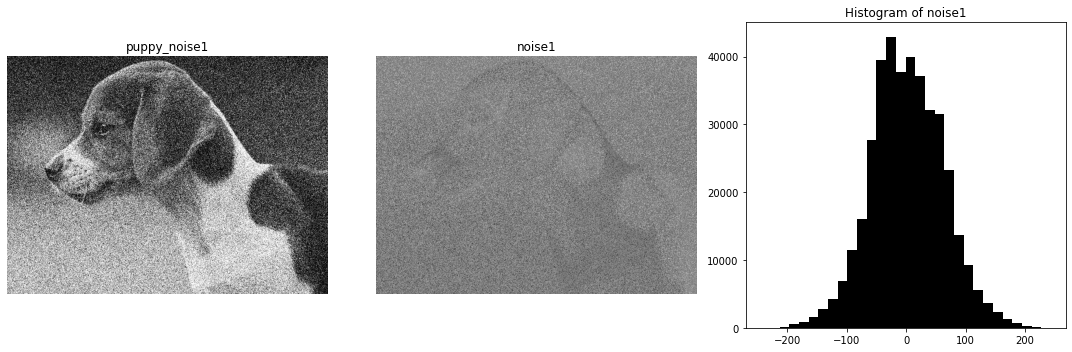

In [ ]:
# read image the original 'test_noiseless.jpg' and its noisy version 'test_gauss_noise.jpg'
orig = io.imread('test_noiseless.jpg').astype('int32')
noisy1 = io.imread('test_gauss_noise.jpg')

# extract the additive noise from the noisy image by subtracting the original image from the noisy one
noise1 = noisy1.astype('int32') - orig

# display the noisy image, noise and histogram of the noise
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].imshow(noisy1, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('puppy_noise1')
ax[0].axis('off')
ax[1].imshow(noise1, cmap=plt.get_cmap('gray'))
ax[1].set_title('noise1')
ax[1].axis('off')
ax[2].hist(noise1.flatten(), bins=30, fc='black')
ax[2].set_title('Histogram of noise1')
fig.tight_layout()

**5.1. Perform image enhancement on the `test_gauss_noise.jpg` image using a `3x3` mean filter and compute the root mean squared error (RMSE) with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure.**

Hint: You can perform the filtering by first constructing the `3x3` mean filter mask (`NumPy array`) and then convolving the image with it using e.g. __[`scipy.signal.convolve2d()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)__ function. Please note the __[difference in (integer) division between Python versions 2 and 3](https://stackoverflow.com/questions/21316968/division-in-python-2-7-and-3-3)__.

RMSE of Noisy Image = 60.627199
RMSE of Enhanced Image = 9.124800


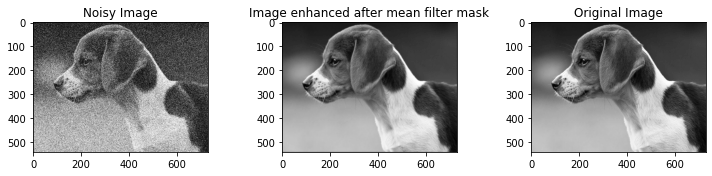

In [ ]:
from scipy import signal

# construct mean filter mask
mean_filter_mask = np.array([[1/9,1/9,1/9],
                            [1/9,1/9,1/9],
                            [1/9,1/9,1/9]])

# convolve the noisy image with the constructed filter mask
c_filter_mask = signal.convolve2d(orig, mean_filter_mask) [1:-1, 1:-1]

# display the noisy, enhanced and original images
fig, a = plt.subplots(1,3, figsize = (10,5))
a[0].imshow(noisy1, cmap =plt.get_cmap('gray'))
a[0].set_title('Noisy Image')
a[1].imshow(c_filter_mask, cmap =plt.get_cmap('gray'))
a[1].set_title('Image enhanced after mean filter mask')
a[2].imshow(orig, cmap =plt.get_cmap('gray'))
a[2].set_title('Original Image')

fig.tight_layout()

# print RMSE before and after enhancement
b_rmse = np.sqrt(np.mean(np.square(np.ravel(noisy1)-np.ravel(orig))))
a_rmse = np.sqrt(np.mean(np.square(np.ravel(c_filter_mask)-np.ravel(orig))))

print('RMSE of Noisy Image = %f'%b_rmse)
print('RMSE of Enhanced Image = %f'%a_rmse)

**5.2. Perform image enhancement on the `test_gauss_noise.jpg` image using a `3x3` __[median filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter)__ and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure.**

RMSE of Noisy Image = 60.627199
RMSE of Enhanced Image = 29.341596


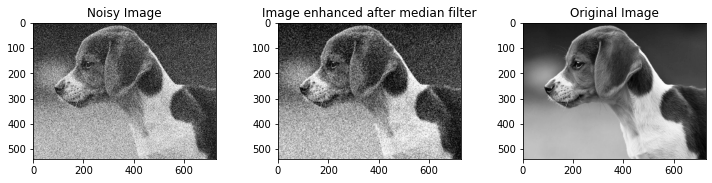

In [ ]:
from scipy.ndimage import median_filter

# apply 3x3 median filter on the noisy image image
median_filter = median_filter(noisy1, size = 3)

# display the noisy, enhanced and original images
fig, b = plt.subplots(1,3, figsize = (10, 5))
b[0].imshow(noisy1, cmap=plt.get_cmap('gray'))
b[0].set_title('Noisy Image')

b[1].imshow(median_filter, cmap=plt.get_cmap('gray'))
b[1].set_title('Image enhanced after median filter')

b[2].imshow(orig, cmap=plt.get_cmap('gray'))
b[2].set_title('Original Image')

fig.tight_layout()
# print RMSE before and after enhancement

b_rmse = np.sqrt(np.mean(np.square(np.ravel(noisy1)-np.ravel(orig))))
a_rmse = np.sqrt(np.mean(np.square(np.ravel(median_filter)-np.ravel(orig))))

print('RMSE of Noisy Image = %f'%b_rmse)
print('RMSE of Enhanced Image = %f'%a_rmse)


**5.3. Perform image enhancement on the `test_gauss_noise.jpg` image using a `5x5` __[Wiener filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html)__ and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure. Please note that you need to convert the input image into `float64` using `astype('float64')` before applying __[`scipy.signal.wiener()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html)__ function!**

/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/usr/local/lib/python3.7/dist-packages/scipy/signal/signaltools.py:1456: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


RMSE of Noisy Image = 60.627199
RMSE of Enhanced Image = 4.577184


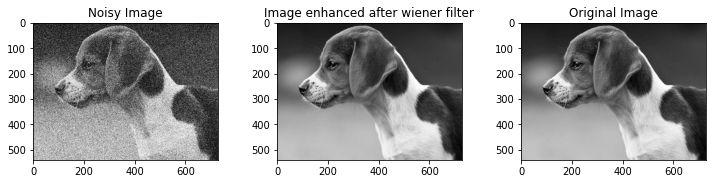

In [ ]:
# apply 5x5 Wiener filter on the noisy image

# first convert the input image to float64 using 'astype('float64')'!
from scipy.signal import wiener
conv_image = orig.astype('float64')
wiener_filter = wiener(conv_image, mysize = 3)
# display the noisy, enhanced and original images
fig, c = plt.subplots(1,3, figsize = (10, 5))
c[0].imshow(noisy1, cmap=plt.get_cmap('gray'))
c[0].set_title('Noisy Image')

c[1].imshow(wiener_filter, cmap=plt.get_cmap('gray'))
c[1].set_title('Image enhanced after wiener filter')

c[2].imshow(orig, cmap=plt.get_cmap('gray'))
c[2].set_title('Original Image')

fig.tight_layout()

# print RMSE before and after enhancement

b_rmse = np.sqrt(np.mean(np.square(np.ravel(noisy1)-np.ravel(orig))))
a_rmse = np.sqrt(np.mean(np.square(np.ravel(wiener_filter)-np.ravel(orig))))

print('RMSE of Noisy Image = %f'%b_rmse)
print('RMSE of Enhanced Image = %f'%a_rmse)

**5.4. Finally, display the three images obtained with mean, median and Wiener filters in the same figure.**

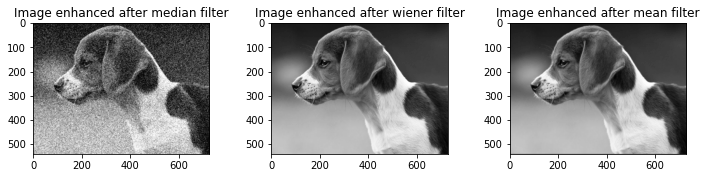

In [ ]:
# display the mean, median and Wiener filtered images
fig, d = plt.subplots(1,3, figsize = (10, 5))
d[0].imshow(median_filter, cmap=plt.get_cmap('gray'))
d[0].set_title('Image enhanced after median filter')

d[1].imshow(wiener_filter, cmap=plt.get_cmap('gray'))
d[1].set_title('Image enhanced after wiener filter')

d[2].imshow(c_filter_mask, cmap=plt.get_cmap('gray'))
d[2].set_title('Image enhanced after mean filter')

fig.tight_layout()

**Which method gave the best result? Why??**

`Wiener Filter provides the best result. The image is clear and it has the least RMSE.`

### Salt-and-pepper noise

The image `test_saltpepper_noise.jpg` suffers from salt-and-pepper noise:

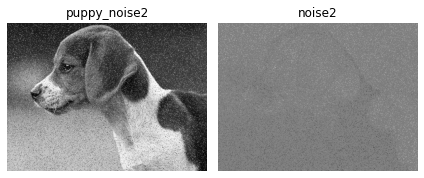

In [ ]:
# read the 'test_saltpepper_noise.jpg' image
noisy2 = io.imread('test_saltpepper_noise.jpg')

# extract additive noise2
noise2 = noisy2.astype('int32') - orig

# display the noisy image and additive noise
fig, ax = plt.subplots(1, 2)
ax[0].imshow(noisy2, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('puppy_noise2')
ax[0].axis('off')
ax[1].imshow(noise2, cmap=plt.get_cmap('gray'))
ax[1].set_title('noise2')
ax[1].axis('off')
fig.tight_layout()

**5.5. Utilizing your knowledge in image enhancement, choose a proper filter for reducing the noise in the `test_saltpepper_noise.jpg` image and compute the RMSE with the original image before and after filtering the noise. Then, display the noisy, enhanced and original image in the same figure.**

RMSE of Noisy Image = 45.491515
RMSE of Enhanced Image = 9.760740


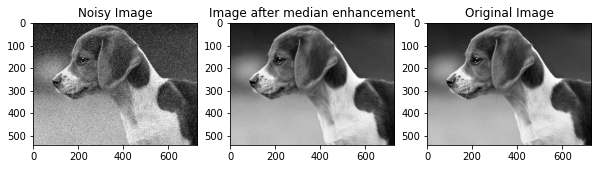

In [ ]:
# reduce the noise with the method of your choice
from scipy.ndimage import median_filter
test_median = median_filter(noisy2, size= 3)

# display the noisy, enhanced and original images
f, e = plt.subplots(1, 3, figsize = (10, 5))
e[0].imshow(noisy2, cmap = plt.get_cmap('gray'))
e[0].set_title('Noisy Image')

e[1].imshow(test_median, cmap = plt.get_cmap('gray'))
e[1].set_title('Image after median enhancement')

e[2].imshow(orig, cmap = plt.get_cmap('gray'))
e[2].set_title('Original Image')

# print RMSE before and after enhancement
b_rmse = np.sqrt(np.mean(np.square(np.ravel(noisy2)-np.ravel(orig))))
a_rmse = np.sqrt(np.mean(np.square(np.ravel(test_median)-np.ravel(orig))))

print('RMSE of Noisy Image = %f'%b_rmse)
print('RMSE of Enhanced Image = %f'%a_rmse)


The binary image `logo_noise3.png` suffers from salt-and-pepper noise as well:

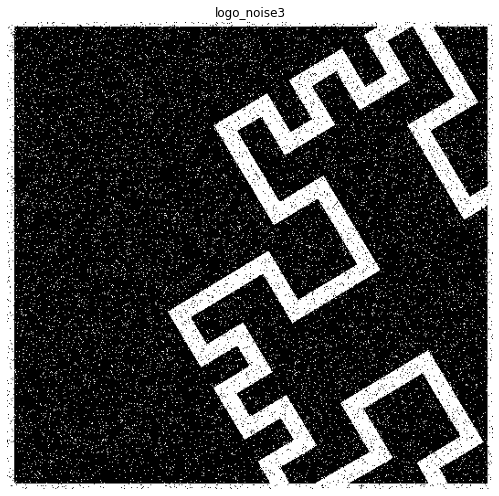

In [ ]:
# read 'logo_noise3.png' as binary image
noisy3 = io.imread('logo_noise3.png').astype('bool_')

# display the noisy binary image
fig, ax = plt.subplots(figsize=(10,7))
ax.imshow(noisy3, cmap=plt.get_cmap('gray'))
ax.set_title('logo_noise3')
ax.axis('off')
fig.tight_layout()



**5.6. Again, utilizing your knowledge in image enhancement, find a way for reducing the noise in the noisy binary image `logo_noise3.png` and display the noisy and enhanced images in the same figure.**

Text(0.5, 1.0, 'Image after median enhancement')

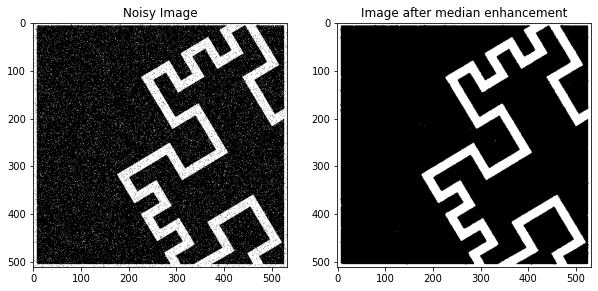

In [ ]:
# remove the noise with the method of your choice
from scipy.ndimage import median_filter
test_median2 = median_filter(noisy3, size= 3)

# display the noisy and enhanced image

f, e = plt.subplots(1, 2, figsize = (10, 5))
e[0].imshow(noisy3, cmap = plt.get_cmap('gray'))
e[0].set_title('Noisy Image')

e[1].imshow(test_median2, cmap = plt.get_cmap('gray'))
e[1].set_title('Image after median enhancement')



# 6. Image enhancement in frequency domain

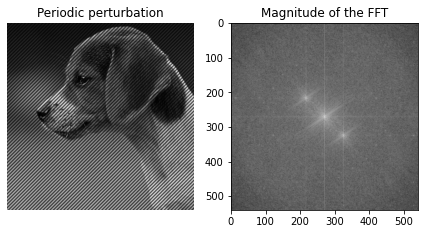

In [ ]:
from scipy import fftpack

# read noisy image 'test_periodic_noise.jpg' and compute its Fourier transform (see Assignment #2)
periodic = io.imread('test_periodic_noise.jpg')
periodic_fft = fftpack.fftshift(fftpack.fft2(periodic))

# display the noisy image and the magnitude of its Fourier transform in the same figure
fig, ax = plt.subplots(1, 2)
ax[0].imshow(periodic, vmin=0, vmax=255, cmap=plt.get_cmap('gray'))
ax[0].set_title('Periodic perturbation')
ax[0].axis('off')
ax[1].imshow(np.log(np.abs(periodic_fft)+1), cmap=plt.get_cmap('gray'))
ax[1].set_title('Magnitude of the FFT')
fig.tight_layout()

The image `test_periodic_noise.jpg` contains a periodic, i.e. sinusoidal, perturbation (see e.g. Section 5.2.3 in course book). You task is to remove the noise as well as you can. In practice, this consists of two main steps 1) locating the noise in the frequency domain, and 2) filtering the perturbation frequency using a proper filter.

Let's take first a look at what a 2D sinusoidal signal looks like in the 2D Fourier space by plotting three signals with different frequencies, `f=2`, `f=4` and `f=8` and their Fourier transforms (FT):

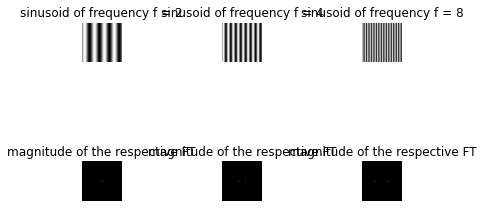

In [ ]:
# sample (x,y) image coordinate space linearly
nx = 100; ny = 100;
x = np.linspace(-1, 1, nx);
y = np.linspace(-1, 1, ny); 
[X, Y] = np.meshgrid(x, y);

# plot the three 2D sinusoids and the magnitudes of their FTs
fig, ax = plt.subplots(2, 3)

f = 2;                 
z = np.sin(2*np.pi*f*X);
ax[0,0].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,0].axis('off')
ax[0,0].set_title('sinusoid of frequency f = 2')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,0].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,0].axis('off')
ax[1,0].set_title('magnitude of the respective FT')

f = 4;                 
z = np.sin(2*np.pi*f*X);
ax[0,1].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,1].axis('off')
ax[0,1].set_title('sinusoid of frequency f = 4')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,1].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,1].axis('off')
ax[1,1].set_title('magnitude of the respective FT')

f = 8;                 
z = np.sin(2*np.pi*f*X);
ax[0,2].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,2].axis('off')
ax[0,2].set_title('sinusoid of frequency f = 8')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,2].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,2].axis('off')
ax[1,2].set_title('magnitude of the respective FT')
fig.tight_layout()

As you can see, a horizontal 2D sinusoid corresponds to two horizontal peaks symmetric to the zero frequency in the magnitude of the Fourier domain and the higher the frequency the further away these peaks are from the origin.

Now, let's take a look at what happens if we rotate the horizontal 2D sinusoid 15, 45 and 75 degrees:

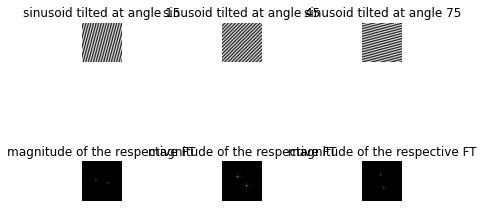

In [ ]:
# plot rotated 2D sinusoids and the magnitudes of their FTs
fig, ax = plt.subplots(2, 3)

theta = 15*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,0].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,0].axis('off')
ax[0,0].set_title('sinusoid tilted at angle 15')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,0].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,0].axis('off')
ax[1,0].set_title('magnitude of the respective FT')

theta = 45*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,1].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,1].axis('off')
ax[0,1].set_title('sinusoid tilted at angle 45')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,1].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,1].axis('off')
ax[1,1].set_title('magnitude of the respective FT')

theta = 75*np.pi/180;
z = np.sin(2*np.pi*f*(Y*np.sin(theta) + X*np.cos(theta)));
ax[0,2].imshow(z, cmap=plt.get_cmap('gray'))
ax[0,2].axis('off')
ax[0,2].set_title('sinusoid tilted at angle 75')

Z = fftpack.fftshift(fftpack.fft2(z))
ax[1,2].imshow((np.abs(Z)+1), cmap=plt.get_cmap('gray'))
ax[1,2].axis('off')
ax[1,2].set_title('magnitude of the respective FT')
fig.tight_layout()

Due to the properties of the 2D FT, the corresponding frequency peaks rotate exactly the same manner.

Now, it should be clear(er) what the periodic perturbation we are dealing with looks like in the FT of the noisy image, i.e. where to look for it. Can you now spot the reason for the periodic perturbation in the spectral image of the image `test_periodic_noise.jpg`?

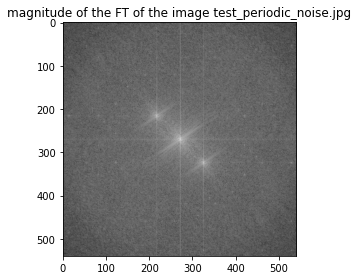

In [ ]:
# display the magnitude of the FT
fig, ax = plt.subplots()
ax.imshow(np.log(np.abs(periodic_fft)+1), cmap=plt.get_cmap('gray'))
ax.set_title('magnitude of the FT of the image test_periodic_noise.jpg')
fig.tight_layout()

This kind of periodic perturbation should be filtered with a notch filter. However, in the following, an ideal band-reject filter is used for the sake of simplicity. So perform the following operations in the reserved code cells in order to remove the periodic perturbation from the test image.

(Please note that you can also implement a notch filter instead if you prefer.)

**6.1. Modify the ideal lowpass (or highpass) filter code from Assignment \#3 to construct an ideal band-reject filter `Hbr` and display band-reject filters with cut-off frequency `D0=0.2` and bandwidths `W=0.05` and `W=0.01` in the same figure.**

Hint: See lecture notes or course book what an ideal band-reject filter looks like. An ideal band-reject filter is just a combination of lowpass and highpass filtering, so now you need to combine the conditions `<` and `>` into one filter in order to reject frequencies within the narrow band.

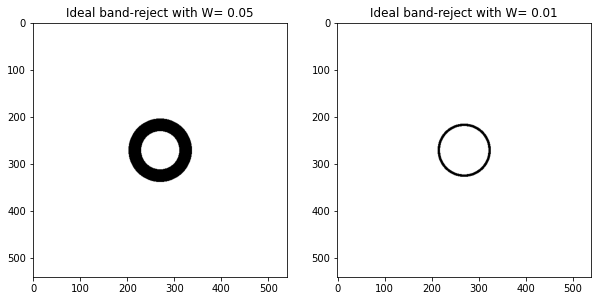

In [ ]:
# create matrix D with absolute frequency values and size of the FT of the image 'test_periodic_noise.jpg' 
n = periodic_fft.shape
f1 = ( np.arange(0,n[0])-np.floor(n[0]/2) ) * (2./(n[0]))
f2 = ( np.arange(0,n[1])-np.floor(n[1]/2) ) * (2./(n[1]))
f1, f2 = np.meshgrid(f1, f2)
D = np.sqrt(f1**2 + f2**2)

# set cut-off frequency 'D0' to 0.2
D0 = 0.2

# set the bandwidth 'W' to 0.05
W = 0.05

# initialize filter matrix 'Hbr' with ones (same size as the fft2 of the test image)
Hbr = np.ones(n)

# set frequencies > or < the threshold to zero, other remain unaltered
Hbr[D>D0+W] = 0
Hbr[D<D0-W] = 0

hbr_1 = np.ones(n)-Hbr

# do the same to construct ideal band-reject filter with 'W' of 0.01
W = 0.01
Hbr = np.ones(n)
Hbr[D>D0+W] = 0
Hbr[D<D0-W] = 0

hbr_2 = np.ones(n) - Hbr

# display both filters with different bandwidths in the same figure
f, g = plt.subplots(1,2, figsize = (10, 7))

g[0].imshow(hbr_1)
g[0].set_title('Ideal band-reject with W= 0.05')


g[1].imshow(hbr_2)
g[1].set_title('Ideal band-reject with W= 0.01')

fig.tight_layout()

**6.2. Find the perturbation frequency in the magnitude of the FT that should be filtered out and filter the noisy image with a band-reject filter having proper `D0` and `W`. Then. display the reconstructed filtered image and the magnitude of its FT in the same figure.**

Hint: You should see two sharp peaks in the spectral image which should be filtered out. They may be somewhat hard to spot but you should know where to look if you followed the introduction part of this assignment carefully. You can either try to determine the perturbation frequency: 

1. manually by trial and error, or 

2. automatically by finding the peak coordinates with __[`skimage.feature.peak_local_max()`](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.peak_local_max)__ function and picking the corresponding relative frequency from the frequency matrix `D` based on the found peak locations.

Please note that you will receive the same amount of points no matter which of the two approaches you choose!

Text(0.5, 1.0, 'Fourier Transform')

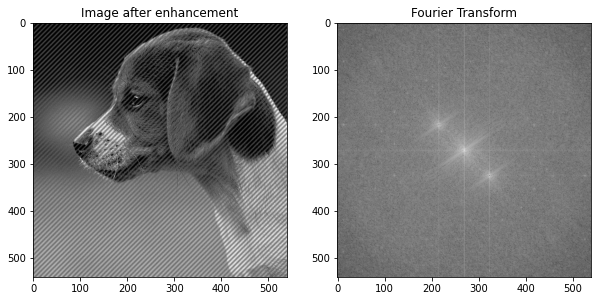

In [ ]:
from skimage.feature import peak_local_max
from scipy import fftpack
# find perturbation frequency 'D0' manually or automatically
peak = peak_local_max(np.real(periodic_fft), num_peaks = 3)[2]
D0 = D[peak[0], peak[1]]
# create a filter mask 'Hbr' size of the FT of the test image
Hbr = np.ones(n)
# set frequencies within a _narrow_ reject band 'W' to zero, other remain unaltered
Hbr[D==D0] = 0
# apply the ideal band-reject filter to fft the test image
filtered_fft = np.multiply(periodic_fft, Hbr)
# reconstruct the enhanced image (see Assignment #2)
e_image = fftpack.ifft2(fftpack.ifftshift(filtered_fft))
e_image = np.real(e_image)
e_image = np.clip(e_image, 0, 255)
e_image = e_image.astype('uint8')
# display the enhanced image and the magnitude of its FT
f, h = plt.subplots(1, 2, figsize = (10, 5))
h[0].imshow(e_image,cmap = plt.get_cmap('gray') )
h[0].set_title('Image after enhancement')

h[1].imshow(np.log(np.abs(filtered_fft)+1)) 
h[1].set_title('Fourier Transform')



**6.3. Finally, display the noisy image `test_periodic_noise.jpg` and the enhanced image in the same figure.**

Text(0.5, 1.0, 'Restored Image')

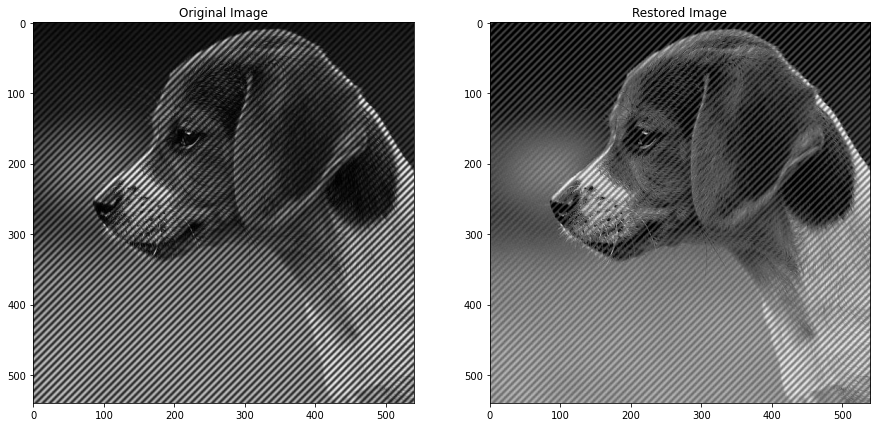

In [ ]:
# display noisy and "restored" image
f, i = plt.subplots(1, 2, figsize = (15, 7))

i[0].imshow(periodic,cmap = plt.get_cmap('gray') )
i[0].set_title('Original Image')

i[1].imshow(e_image,cmap = plt.get_cmap('gray') )
i[1].set_title('Restored Image')

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`4 Hours`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`Yes. But there was enough help available.`

# References
`https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html#scipy.ndimage.median_filter`

`https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.wiener.html`

`https://theailearner.com/2019/05/07/add-different-noise-to-an-image/`

`https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a`


# Submission

1. Before submitting your work, **check that your notebook (code) runs from scratch** and reproduces all the requested results by clicking on the menu `Kernel -> Restart & Run All`! Also, check that you have answered all the questions written in **bold**.
2. Clear all outputs and variables, etc. by click on the menu `Kernel -> Restart & Clear Output`. This may (or will) reduce the file size of your deliverable a lot! 
3. Rename this Jupyter notebook to **`DIP_PA4_[student number(s)].ipynb`** (e.g. `DIP_PA4_1234567.ipynb` if solo work or `DIP_PA4_1234567-7654321.ipynb` if pair work) and upload it as your submission to Moodle.